# Import Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Show plots inline
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [3]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('/Users/swatisharma/Documents/GitHub/Capstone_3/fashion_products.csv')
df.head()

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M


# Inspect the Data

In [4]:
# Code task 2
# Check if there are unique values for each column

df.nunique()

User ID          100
Product ID      1000
Product Name       5
Brand              5
Category           3
Price             91
Rating          1000
Color              6
Size               4
dtype: int64

In [5]:
# Code task 3
# Check the shape of the data

print(df.shape)

(1000, 9)


In [6]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


In [7]:
# Code task 5
# Check if there are any missing values in the columns

df.isnull().sum()

User ID         0
Product ID      0
Product Name    0
Brand           0
Category        0
Price           0
Rating          0
Color           0
Size            0
dtype: int64

In [8]:
# Code task 6
# Check the description of the numerical column in the DataFrame

df.describe()

,User ID,Product ID,Price,Rating
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135
std,28.78131,288.819436,26.291748,1.153185
min,1.00000,1.000000,10.000000,1.000967
25%,26.00000,250.750000,33.000000,1.992786
50%,50.00000,500.500000,57.000000,2.984003
75%,75.00000,750.250000,78.250000,3.985084
max,100.00000,1000.000000,100.000000,4.987964


In [9]:
# Code task 7
# Use df's`select_dtypes` method to select only numeric columns

df.select_dtypes(include = "number")

,User ID,Product ID,Price,Rating
0,19,1,40,1.043159
1,97,2,82,4.026416
2,25,3,44,3.337938
3,57,4,23,1.049523
4,79,5,79,4.302773
...,...,...,...,...
995,20,996,55,1.620081
996,42,997,13,1.544464
997,9,998,47,3.961913
998,8,999,68,3.089722


In [10]:
#Code task 8
#Use pandas' Series method `value_counts` to check the frequency of a Brand occurred in the data

df['Brand'].value_counts().head()

Brand
Nike      214
Zara      203
Adidas    198
H&M       194
Gucci     191
Name: count, dtype: int64

In [11]:
# Code task 9
# Call data's `describe` method for a statistical summary of the numerical columns
# Hint: there are fewer summary stat columns than features, so displaying the transpose will be useful again

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,1000.0,50.419000,28.781310,1.000000,26.000000,50.000000,75.000000,100.000000
Product ID,1000.0,500.500000,288.819436,1.000000,250.750000,500.500000,750.250000,1000.000000
Price,1000.0,55.785000,26.291748,10.000000,33.000000,57.000000,78.250000,100.000000
Rating,1000.0,2.993135,1.153185,1.000967,1.992786,2.984003,3.985084,4.987964


# Distribution Of dataset
Our primary focus is to observe the distribution of the data and display any outliers attributes in data.

# Visualizing Numerical Data Distribution

array([[<Axes: title={'center': 'User ID'}>,
        <Axes: title={'center': 'Product ID'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Rating'}>]], dtype=object)

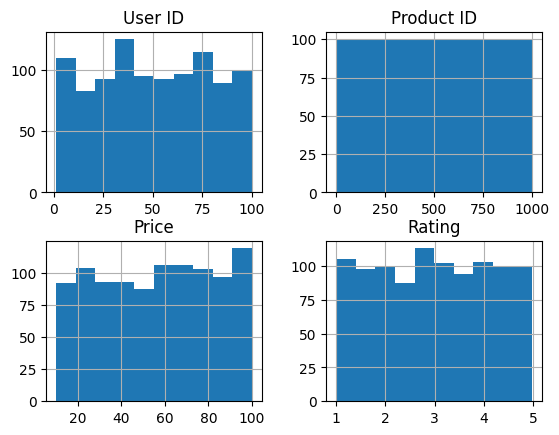

In [12]:
# Code task 10
# Call df_train's `hist` method to plot histograms to check if there are any outliers in columns

df.hist()

<Axes: >

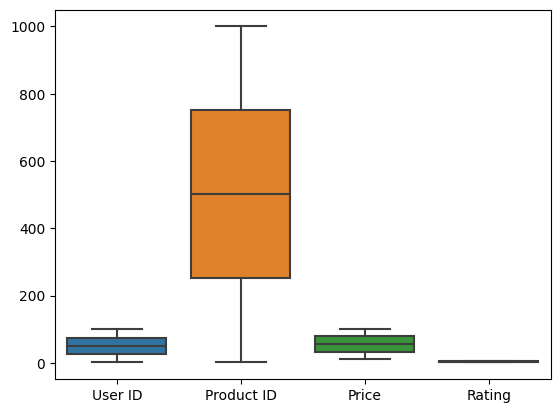

In [13]:
# Code task 11
# Create a seaborn boxplot of the df dataframe we created above,to again confirm for the outliers
# in each columns. This will use boxplot's data argument.
# Compare the dataset - Our goal is to understand whether the distribution is symmetrical or skewed and display any outliers attributes in data.

sns.boxplot(df)

No outliers detected in all numeric columns including User ID, Product ID, Price, Rating

# Visualizing Categorical Data Distribution

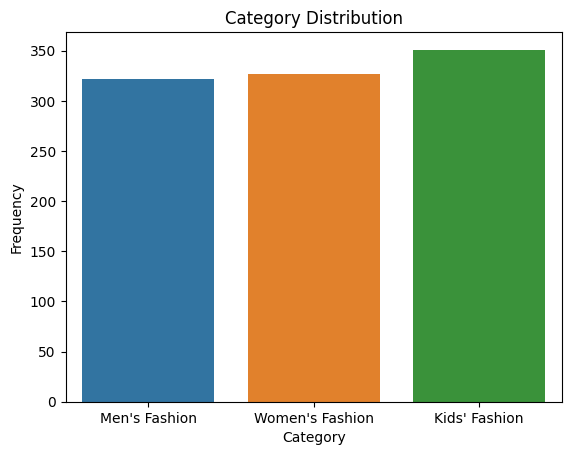

In [14]:
# Code task 12
# Use train data's `plot()` method to create a barplot with 'Category' on the x-axis 
# Shows frequency distribution of various Categories

sns.countplot(x='Category', data=df)
plt.title('Category Distribution')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

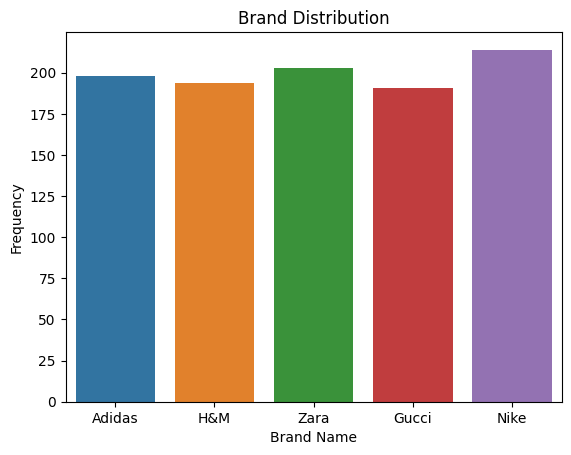

In [15]:
# Code task 13
# Use train data's `plot()` method to create a barplot with 'Brand' on the x-axis 
# Shows frequency distribution of various Brands

sns.countplot(x='Brand', data=df)
plt.title('Brand Distribution')
plt.xlabel('Brand Name')
plt.ylabel('Frequency')
plt.show()

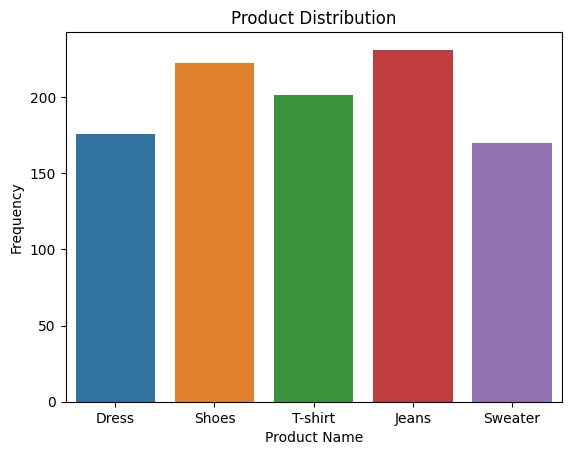

In [16]:
# Code task 14
# Use train data's `plot()` method to create a barplot with 'Product Name' on the x-axis 
# Shows frequency distribution of various Products

sns.countplot(x='Product Name', data=df)
plt.title('Product Distribution')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.show()

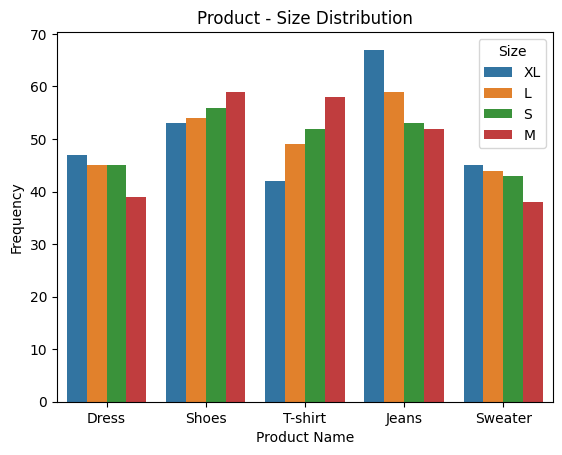

In [17]:
# Code task 15
# Use train data's `plot()` method to create a barplot with 'Product Name' on the x-axis 
# Shows frequency distribution of various Products in terms of size

sns.countplot(x='Product Name', hue = "Size", data=df)
plt.title('Product - Size Distribution')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.show()

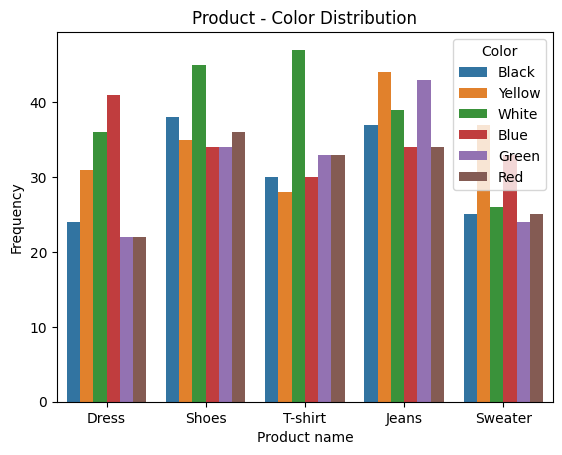

In [18]:
# Code task 16
# Use train data's `plot()` method to create a barplot with 'Product Name' on the x-axis 
# Shows frequency distribution of various Products in terms of Color

sns.countplot(x='Product Name', hue = "Color", data=df)
plt.title('Product - Color Distribution')
plt.xlabel('Product name')
plt.ylabel('Frequency')
plt.show()

# Plot Summary and Conclusions 
Based on the above histogram, box plot (Numerical variables) and bar plot (Categorical variables), we can make the following conclusions:

Above plot clearly depicts that the distribution of data is multi-modal that has multiple peaks and also the length of two whiskers are varied.

There are no outliers present in the data.

The frequency of Kid's fashion is slight higher than the men's and women's fashion.

Among all the brands, the count of Nike products are slightly higher than other brands.

Products such as Jeans, shoes and t-shirts are more popular in this dataset.

In product jeans, XL seems most popular. M size tops the list in two product categories, shoes and t-shirts. 

Color White seems extremely popular in shoes and t-shirt categories. 

# Explore The Data Further

# Handling Non-Numeric Features (Categorical variables)

Encoding all non-numeric features such as "Product Name", "Brand", "Category", "Color", "Size" into numeric values

In [19]:
# Code task 17
#Create dummy or indicator features for categorical variable "Product Name", "Brand", "Category", "Color", "Size"

#categorical data
categorical_cols = ["Product Name", "Brand", "Category", "Color", "Size"] 

#import pandas as pd
df_new = pd.get_dummies(df, columns = categorical_cols, dtype=int)
df_new

,User ID,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
0,19,1,40,1.043159,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,97,2,82,4.026416,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
2,25,3,44,3.337938,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
3,57,4,23,1.049523,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,79,5,79,4.302773,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,20,996,55,1.620081,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
996,42,997,13,1.544464,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
997,9,998,47,3.961913,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
998,8,999,68,3.089722,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [20]:
# Code task 18
# Check the shape of the new dataframe (including newly encoded columns) in the DataFrame

print(df_new.shape)

(1000, 27)


In [21]:
# Code task 19
# Check the format of all columns (including newly encoded columns) in the DataFrame

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   1000 non-null   int64  
 1   Product ID                1000 non-null   int64  
 2   Price                     1000 non-null   int64  
 3   Rating                    1000 non-null   float64
 4   Product Name_Dress        1000 non-null   int64  
 5   Product Name_Jeans        1000 non-null   int64  
 6   Product Name_Shoes        1000 non-null   int64  
 7   Product Name_Sweater      1000 non-null   int64  
 8   Product Name_T-shirt      1000 non-null   int64  
 9   Brand_Adidas              1000 non-null   int64  
 10  Brand_Gucci               1000 non-null   int64  
 11  Brand_H&M                 1000 non-null   int64  
 12  Brand_Nike                1000 non-null   int64  
 13  Brand_Zara                1000 non-null   int64  
 14  Category_

All columns are numeric 

In [22]:
# Code task 20
# Check the description of all the numerical columns (including newly encoded columns) in the DataFrame

df_new.describe()

,User ID,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,50.41900,500.500000,55.785000,2.993135,0.176000,0.231000,0.222000,0.170000,0.201000,0.198000,...,0.154000,0.172000,0.156000,0.15000,0.19300,0.175000,0.251000,0.246000,0.24900,0.254000
std,28.78131,288.819436,26.291748,1.153185,0.381011,0.421683,0.415799,0.375821,0.400949,0.398692,...,0.361129,0.377569,0.363037,0.35725,0.39485,0.380157,0.433805,0.430894,0.43265,0.435515
min,1.00000,1.000000,10.000000,1.000967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,26.00000,250.750000,33.000000,1.992786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,50.00000,500.500000,57.000000,2.984003,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,75.00000,750.250000,78.250000,3.985084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,1.000000,0.000000,0.00000,1.000000
max,100.00000,1000.000000,100.000000,4.987964,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000


# Rating for each Product ID

Distribution of Rating per Product ID, shows how rating for each Product ID look like?

In [23]:
# Code task 21

df_train = df_new.set_index('Product ID')
df_train

,User ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
Product ID,,,,,,,,,,,,,,,,,,,,,
1,19,40,1.043159,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,97,82,4.026416,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,25,44,3.337938,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,57,23,1.049523,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,79,79,4.302773,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,20,55,1.620081,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
997,42,13,1.544464,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
998,9,47,3.961913,0,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [24]:
# Code task 22

df_train.Rating.sort_values(ascending=False).head()

Product ID
502    4.987964
418    4.986091
579    4.985950
199    4.980656
704    4.979678
Name: Rating, dtype: float64

Product ID 502, 418, 579 dominates per Rating.

# Total Price distribution per Product ID

In [25]:
# Code task 23

df_train.Price.sort_values(ascending=False)

Product ID
269    100
869    100
712    100
938    100
92     100
      ... 
928     10
559     10
729     10
604     10
132     10
Name: Price, Length: 1000, dtype: int64

Product ID 269, 869, 712 are among top three products that are most expensive.

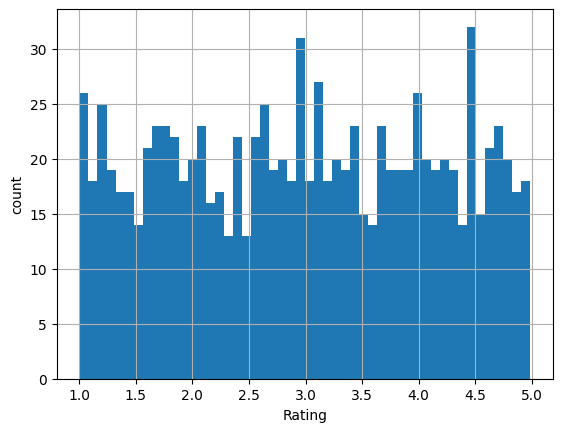

In [26]:
# Code task 24
# Call df_train's `hist` method to plot histograms to view the distribution of Rating per product ID

df_train.Rating.hist(bins = 50)
plt.xlabel('Rating')
plt.ylabel('count');

# Visualizing High Dimensional Data

# Scale the data

We only want numeric data here and use scale() to scale the data which returns an ndarray to visualise scaled data. 
Now we construct a dataframe from the ndarray here and reintroduce the column names.

In [27]:
# Code task 25

#Create a new dataframe, `df_train_scale` from `df_new whilst setting the index to 'Product ID'
df_train_scale = df_new.set_index("Product ID")
#Save the product labels (using the index attribute of `df_train_scale`) into the variable 'df_train_index'
df_train_index = df_train_scale.index
#Save the column names (using the `columns` attribute)` into the variable 'df_train_columns'
df_train_columns = df_train_scale.columns
df_train_scale.head()

,User ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
Product ID,,,,,,,,,,,,,,,,,,,,,
1,19,40,1.043159,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,97,82,4.026416,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,25,44,3.337938,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,57,23,1.049523,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
5,79,79,4.302773,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [28]:
# Code task 26

df_train_scale.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 1000
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   1000 non-null   int64  
 1   Price                     1000 non-null   int64  
 2   Rating                    1000 non-null   float64
 3   Product Name_Dress        1000 non-null   int64  
 4   Product Name_Jeans        1000 non-null   int64  
 5   Product Name_Shoes        1000 non-null   int64  
 6   Product Name_Sweater      1000 non-null   int64  
 7   Product Name_T-shirt      1000 non-null   int64  
 8   Brand_Adidas              1000 non-null   int64  
 9   Brand_Gucci               1000 non-null   int64  
 10  Brand_H&M                 1000 non-null   int64  
 11  Brand_Nike                1000 non-null   int64  
 12  Brand_Zara                1000 non-null   int64  
 13  Category_Kids' Fashion    1000 non-null   int64  
 14  Category_Men'

In [29]:
# Code task 27

df_train_scale = scale(df_train_scale)

In [30]:
#Code task 28
#Create a new dataframe from `df_merged_scale` using the column names we saved in `df_merged_columns`

df_train_scaled_df = pd.DataFrame(df_train_scale, columns= df_train_columns)
df_train_scaled_df.head()

,User ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,Brand_Gucci,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
0,-1.092192,-0.600679,-1.691793,2.163751,-0.548079,-0.534179,-0.45257,-0.501562,2.012587,-0.485895,...,2.343823,-0.455773,-0.429923,-0.420084,-0.489037,-0.460566,-0.578890,-0.571192,-0.575811,1.713770
1,1.619256,0.997580,0.896472,-0.462160,-0.548079,1.872032,-0.45257,-0.501562,-0.496873,-0.485895,...,2.343823,-0.455773,-0.429923,-0.420084,-0.489037,-0.460566,1.727444,-0.571192,-0.575811,-0.583509
2,-0.883619,-0.448464,0.299150,2.163751,-0.548079,-0.534179,-0.45257,-0.501562,2.012587,-0.485895,...,-0.426653,-0.455773,-0.429923,-0.420084,-0.489037,2.171241,-0.578890,-0.571192,-0.575811,1.713770
3,0.228770,-1.247593,-1.686272,-0.462160,-0.548079,1.872032,-0.45257,-0.501562,-0.496873,-0.485895,...,-0.426653,-0.455773,-0.429923,-0.420084,2.044834,-0.460566,-0.578890,-0.571192,1.736682,-0.583509
4,0.993537,0.883418,1.136238,-0.462160,-0.548079,-0.534179,-0.45257,1.993771,2.012587,-0.485895,...,2.343823,-0.455773,-0.429923,-0.420084,-0.489037,-0.460566,-0.578890,1.750726,-0.575811,-0.583509


# Verifying the scaling

First of all, I check the mean of the scaled features using panda's mean() DataFrame method.

In [31]:
#Code task 29
#Call `df_merged_scaled_df`'s `mean()` method

df_train_scaled_df.mean()

User ID                     1.172396e-16
Price                       1.456613e-16
Rating                      3.197442e-16
Product Name_Dress          3.197442e-17
Product Name_Jeans          7.105427e-18
Product Name_Shoes         -1.598721e-17
Product Name_Sweater       -2.309264e-17
Product Name_T-shirt       -1.101341e-16
Brand_Adidas               -4.618528e-17
Brand_Gucci                 3.552714e-17
Brand_H&M                  -3.197442e-17
Brand_Nike                  4.352074e-17
Brand_Zara                 -1.092459e-16
Category_Kids' Fashion     -4.618528e-17
Category_Men's Fashion     -4.618528e-17
Category_Women's Fashion   -5.684342e-17
Color_Black                -3.375078e-17
Color_Blue                  4.973799e-17
Color_Green                -5.329071e-17
Color_Red                   1.065814e-17
Color_White                -1.216804e-16
Color_Yellow               -7.105427e-18
Size_L                     -4.263256e-17
Size_M                      1.598721e-17
Size_S          

Perform a similar check for the standard deviation using pandas's std() DataFrame method.

In [32]:
#Code task 30
#Call `df_merged_scaled_df`'s `std()` method

df_train_scaled_df.std()

User ID                     1.0005
Price                       1.0005
Rating                      1.0005
Product Name_Dress          1.0005
Product Name_Jeans          1.0005
Product Name_Shoes          1.0005
Product Name_Sweater        1.0005
Product Name_T-shirt        1.0005
Brand_Adidas                1.0005
Brand_Gucci                 1.0005
Brand_H&M                   1.0005
Brand_Nike                  1.0005
Brand_Zara                  1.0005
Category_Kids' Fashion      1.0005
Category_Men's Fashion      1.0005
Category_Women's Fashion    1.0005
Color_Black                 1.0005
Color_Blue                  1.0005
Color_Green                 1.0005
Color_Red                   1.0005
Color_White                 1.0005
Color_Yellow                1.0005
Size_L                      1.0005
Size_M                      1.0005
Size_S                      1.0005
Size_XL                     1.0005
dtype: float64

Since scale() uses the biased estimator for standard deviation (ddof=0), I calculates the standard deviation of the sample using std() method and defaults to using ddof=1, that is it's normalized by N-1.

In [56]:
#Code task 31
#Repeat the previous call to `std()` but pass in ddof=0 

df_train_df = df_train_scaled_df.std(ddof=0)
df_train_df

User ID                     1.0
Price                       1.0
Rating                      1.0
Product Name_Dress          1.0
Product Name_Jeans          1.0
Product Name_Shoes          1.0
Product Name_Sweater        1.0
Product Name_T-shirt        1.0
Brand_Adidas                1.0
Brand_Gucci                 1.0
Brand_H&M                   1.0
Brand_Nike                  1.0
Brand_Zara                  1.0
Category_Kids' Fashion      1.0
Category_Men's Fashion      1.0
Category_Women's Fashion    1.0
Color_Black                 1.0
Color_Blue                  1.0
Color_Green                 1.0
Color_Red                   1.0
Color_White                 1.0
Color_Yellow                1.0
Size_L                      1.0
Size_M                      1.0
Size_S                      1.0
Size_XL                     1.0
dtype: float64

# Feature correlation heatmap

Use the heatmap to uncover relationships between features and understand the underlying structure of the data.

In [62]:
#Code task 32

# Compute the correlation matrix

correlation_matrix = df_new.corr()
correlation_matrix.head()

,User ID,Product ID,Price,Rating,Product Name_Dress,Product Name_Jeans,Product Name_Shoes,Product Name_Sweater,Product Name_T-shirt,Brand_Adidas,...,Color_Black,Color_Blue,Color_Green,Color_Red,Color_White,Color_Yellow,Size_L,Size_M,Size_S,Size_XL
User ID,1.000000,-0.021075,0.003363,0.044837,-0.020515,-0.066625,0.001420,0.036626,0.053762,-0.006365,...,-0.063132,-0.047353,0.039723,0.035062,0.024499,0.010674,-0.023264,-0.005252,0.057611,-0.028863
Product ID,-0.021075,1.000000,0.034602,0.033896,-0.053278,-0.022754,0.000850,0.017476,0.057297,-0.027157,...,0.067526,0.019286,-0.027476,0.023429,0.001918,-0.081072,0.027368,-0.031385,0.011756,-0.007886
Price,0.003363,0.034602,1.000000,0.033927,-0.043883,0.019020,0.019387,-0.017166,0.017682,-0.042918,...,0.015509,-0.027329,0.012432,0.005355,0.009112,-0.013958,-0.030194,0.070235,-0.084960,0.044987
Rating,0.044837,0.033896,0.033927,1.000000,0.009008,-0.009023,-0.041541,0.064745,-0.016678,-0.021733,...,-0.028359,-0.006494,0.025262,-0.032872,0.016146,0.023387,0.005731,-0.022484,0.016275,0.000370
Product Name_Dress,-0.020515,-0.053278,-0.043883,0.009008,1.000000,-0.253300,-0.246876,-0.209160,-0.231802,0.014181,...,-0.022582,0.074648,-0.039484,-0.032358,0.013520,0.001382,0.004990,-0.026193,0.007141,0.013851


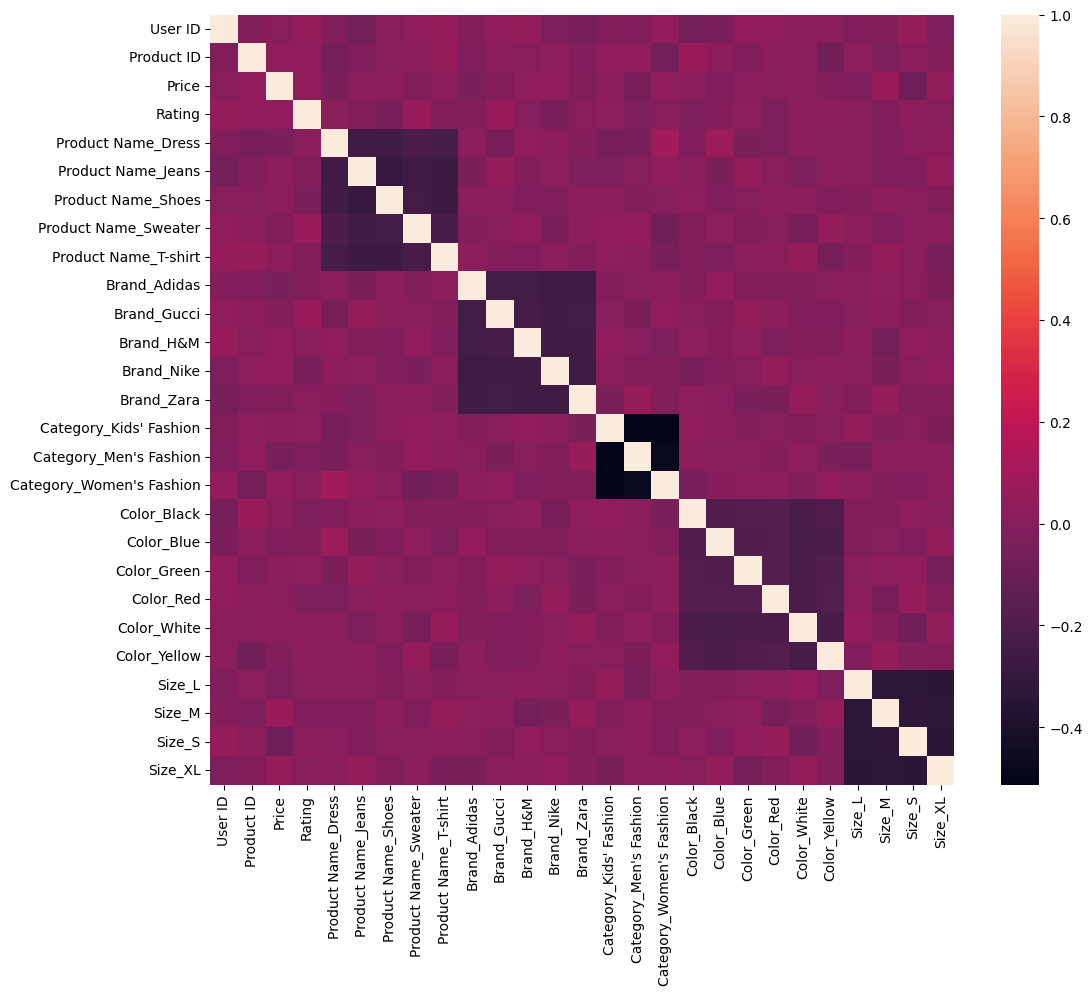

In [64]:
#Code task 33

plt.subplots(figsize=(12,10))
sns.heatmap(df_new.corr(numeric_only=True));

In [65]:
#Code task 34
#Save the data to a new csv file

df_new.to_csv('df_new_features.csv', index=False)